In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

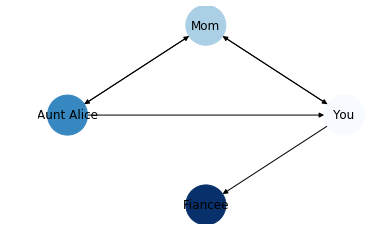

In [15]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()


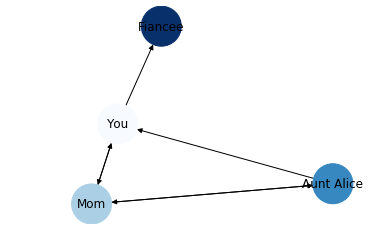

In [3]:
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [4]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G)))

print('The node degrees are {}.'.format(G.degree()))


This graph has 4 nodes and 6 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('Mom', 'You'), ('Mom', 'Aunt Alice'), ('Aunt Alice', 'Mom'), ('Aunt Alice', 'You')].
The betweenness centrality scores are {'You': 0.3333333333333333, 'Mom': 0.16666666666666666, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The node degrees are [('You', 4), ('Mom', 4), ('Aunt Alice', 3), ('Fiancee', 1)].


In [5]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')
print("Shortest paths:", nx.all_pairs_shortest_path(G))

Simple paths: {'You': {'Mom': 1, 'Aunt Alice': 1, 'Fiancee': 1}, 'Mom': {'You': 2, 'Aunt Alice': 1, 'Fiancee': 1}, 'Aunt Alice': {'You': 2, 'Mom': 2, 'Fiancee': 1}, 'Fiancee': {'You': 0, 'Mom': 0, 'Aunt Alice': 0}} 

Shortest paths: <generator object all_pairs_shortest_path at 0xa222f9390>


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


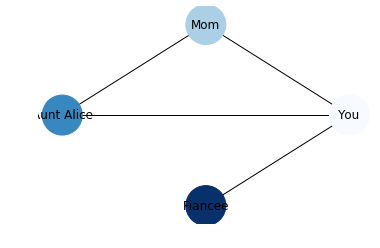

This graph has 4 nodes and 4 edges.
The "Aunt Alice" node has a degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Aunt Alice'), ('Mom', 'Aunt Alice')].
The clustering coefficients are: {'You': 0.3333333333333333, 'Mom': 1.0, 'Aunt Alice': 1.0, 'Fiancee': 0}
The betweenness centrality scores are {'You': 0.6666666666666666, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The degree centrality scores are [('You', 3), ('Mom', 2), ('Aunt Alice', 2), ('Fiancee', 1)]


In [6]:
# Converting to an undirected graph
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(UG,
                 pos=nx.circular_layout(UG), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))

print('The "Aunt Alice" node has a degree of {}.'.format(UG.degree('Aunt Alice')))

print("The nodes are {}.".format(UG.nodes()))

print("The edges are {}.".format(UG.edges()))

#Note that networkx does not have defined clustering algorithms for directed graphs.
print("The clustering coefficients are: {}".format(nx.clustering(UG)))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(UG)))
print("The degree centrality scores are {}".format(nx.degree(UG)))

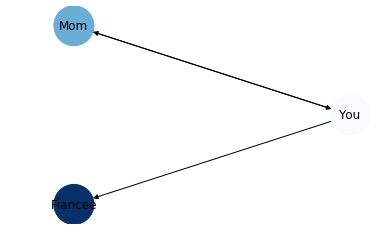

[('You', 'Mom'), ('You', 'Fiancee'), ('Mom', 'You')]


In [7]:
small_G=G.copy()
small_G.remove_node('Aunt Alice')
nx.draw_networkx(small_G,pos=nx.circular_layout(small_G),node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(small_G)))
plt.axis('off')
plt.show()

print(small_G.edges())



The clustering coefficients are: {'You': 0.03333333333333334, 'Mom': 0.10000000000000002, 'Aunt Alice': 0.10000000000000002, 'Fiancee': 0}
The betweenness centrality scores are {'You': 1.0, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The degree centrality scores are [('You', 8.1), ('Mom', 11), ('Aunt Alice', 10.1), ('Fiancee', 7)]


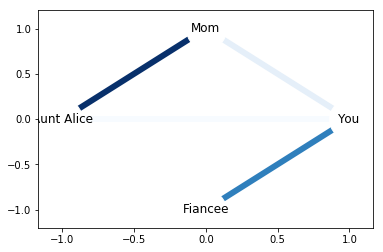

In [8]:
weighted_UG=UG.copy()

#Adding weights reflecting that Aunt Alice and Mom talk more than once a day
weighted_UG['Aunt Alice']['Mom']['weight'] = 10
#Adding a weight reflecting that You and Mom text once a week
weighted_UG['You']['Mom']['weight'] = 1
#Adding a weight reflecting that Aunt Alice almost never talks to You
weighted_UG['Aunt Alice']['You']['weight'] = .1
#Adding a weight reflecting that You talk to your fiancee every day
weighted_UG['You']['Fiancee']['weight'] = 7

#Extracting edges and weights into two lists
edges,weights=zip(*nx.get_edge_attributes(weighted_UG,'weight').items())
nx.draw_networkx(weighted_UG,
                 pos=nx.circular_layout(weighted_UG),
                 node_size=1600,
                 node_color="white", 
                 edgelist=edges, #Ordering the edges so that the weights list works
                 edge_color=weights, #Weights
                 width=6.0, 
                 edge_cmap=plt.cm.Blues) #Darker colors indicate higher weights

#Note that to incorporate weights into most calculations in networkx, you need to specify the name of the weight attribute.
print("The clustering coefficients are: {}".format(nx.clustering(weighted_UG, weight='weight')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(weighted_UG, weight='weight')))
print("The degree centrality scores are {}".format(nx.degree(weighted_UG, weight='weight')))

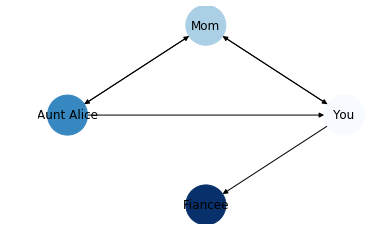

In [24]:
# G.node['You']='Fred'
# G.node['Aunt Alice']='Alice'
# G.node['Mom']='Brunhilde'
# G.node['Fiancee']='Mary'

# G=nx.path_graph(3)  # nodes 0-1-2

nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
mapping={'You':'Fred','Aunt Alice':'Alice','Mom':'Brunhilde', 'Fiancee':'Mary'}
nx.relabel_nodes(G,mapping)
plt.axis('off')
plt.show()

# Drill: Exploring a Graph

Take [this graph file](assets/graph.gml) and discover the following:

1. Number of nodes: **77**
2. Number of edges: **254**
3. Is the graph directed or undirected? **Undirected**
4. Which node has the highest degree? **Valjean**
5. Average clustering coefficient (if possible): **0.57**
6. The nodes with the three highest betweenness centrality scores, and their scores: 
**Valjean: 0.57,
Myriel: 0.18,
Gavroche: 0.17**

Also experiment with various ways to draw the network.


In [26]:
# G = nx.path_graph(4)
G = nx.read_gml('graph.gml')

In [30]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

This graph has 77 nodes and 254 edges.


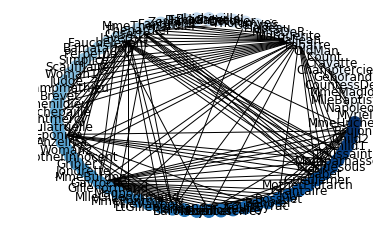

In [33]:
#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=160, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

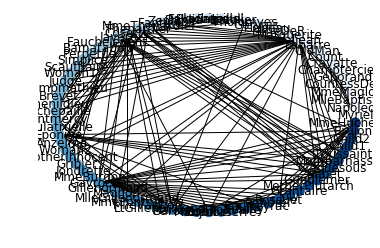

In [35]:
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=100, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [36]:
print('The node degrees are {}.'.format(G.degree()))

The node degrees are [('Myriel', 10), ('Napoleon', 1), ('MlleBaptistine', 3), ('MmeMagloire', 3), ('CountessDeLo', 1), ('Geborand', 1), ('Champtercier', 1), ('Cravatte', 1), ('Count', 1), ('OldMan', 1), ('Labarre', 1), ('Valjean', 36), ('Marguerite', 2), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Tholomyes', 9), ('Listolier', 7), ('Fameuil', 7), ('Blacheville', 7), ('Favourite', 7), ('Dahlia', 7), ('Zephine', 7), ('Fantine', 15), ('MmeThenardier', 11), ('Thenardier', 16), ('Cosette', 11), ('Javert', 17), ('Fauchelevent', 4), ('Bamatabois', 8), ('Perpetue', 2), ('Simplice', 4), ('Scaufflaire', 1), ('Woman1', 2), ('Judge', 6), ('Champmathieu', 6), ('Brevet', 6), ('Chenildieu', 6), ('Cochepaille', 6), ('Pontmercy', 3), ('Boulatruelle', 1), ('Eponine', 11), ('Anzelma', 3), ('Woman2', 3), ('MotherInnocent', 2), ('Gribier', 1), ('Jondrette', 1), ('MmeBurgon', 2), ('Gavroche', 22), ('Gillenormand', 7), ('Magnon', 2), ('MlleGillenormand', 7), ('MmePontmercy', 2), ('MlleVaubois', 1), ('Lt

In [105]:
import operator
sorted(G.degree(), key=operator.itemgetter(1), reverse=True)

[('Valjean', 36),
 ('Gavroche', 22),
 ('Marius', 19),
 ('Javert', 17),
 ('Thenardier', 16),
 ('Fantine', 15),
 ('Enjolras', 15),
 ('Courfeyrac', 13),
 ('Bossuet', 13),
 ('Bahorel', 12),
 ('Joly', 12),
 ('MmeThenardier', 11),
 ('Cosette', 11),
 ('Eponine', 11),
 ('Mabeuf', 11),
 ('Combeferre', 11),
 ('Feuilly', 11),
 ('Myriel', 10),
 ('Grantaire', 10),
 ('Gueulemer', 10),
 ('Babet', 10),
 ('Claquesous', 10),
 ('Tholomyes', 9),
 ('Prouvaire', 9),
 ('Montparnasse', 9),
 ('Bamatabois', 8),
 ('Listolier', 7),
 ('Fameuil', 7),
 ('Blacheville', 7),
 ('Favourite', 7),
 ('Dahlia', 7),
 ('Zephine', 7),
 ('Gillenormand', 7),
 ('MlleGillenormand', 7),
 ('Brujon', 7),
 ('MmeHucheloup', 7),
 ('Judge', 6),
 ('Champmathieu', 6),
 ('Brevet', 6),
 ('Chenildieu', 6),
 ('Cochepaille', 6),
 ('Fauchelevent', 4),
 ('Simplice', 4),
 ('LtGillenormand', 4),
 ('MlleBaptistine', 3),
 ('MmeMagloire', 3),
 ('Pontmercy', 3),
 ('Anzelma', 3),
 ('Woman2', 3),
 ('Toussaint', 3),
 ('Marguerite', 2),
 ('Perpetue', 2),
 (

In [67]:
print("The clustering coefficients are: {}".format(nx.clustering(weighted_UG, weight='weight')))

The clustering coefficients are: {'You': 0.03333333333333334, 'Mom': 0.10000000000000002, 'Aunt Alice': 0.10000000000000002, 'Fiancee': 0}


In [70]:
print("The clustering coefficients are: {}".format(nx.clustering(G, weight='weight')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G, weight='weight')))
print("The degree centrality scores are {}".format(nx.degree(G, weight='weight')))

The clustering coefficients are: {'Myriel': 0.06666666666666667, 'Napoleon': 0, 'MlleBaptistine': 1.0, 'MmeMagloire': 1.0, 'CountessDeLo': 0, 'Geborand': 0, 'Champtercier': 0, 'Cravatte': 0, 'Count': 0, 'OldMan': 0, 'Labarre': 0, 'Valjean': 0.12063492063492064, 'Marguerite': 1.0, 'MmeDeR': 0, 'Isabeau': 0, 'Gervais': 0, 'Tholomyes': 0.6111111111111112, 'Listolier': 1.0, 'Fameuil': 1.0, 'Blacheville': 1.0, 'Favourite': 1.0, 'Dahlia': 1.0, 'Zephine': 1.0, 'Fantine': 0.3142857142857143, 'MmeThenardier': 0.4909090909090909, 'Thenardier': 0.4083333333333333, 'Cosette': 0.38181818181818183, 'Javert': 0.3235294117647059, 'Fauchelevent': 0.3333333333333333, 'Bamatabois': 0.6428571428571429, 'Perpetue': 1.0, 'Simplice': 0.6666666666666666, 'Scaufflaire': 0, 'Woman1': 1.0, 'Judge': 1.0, 'Champmathieu': 1.0, 'Brevet': 1.0, 'Chenildieu': 1.0, 'Cochepaille': 1.0, 'Pontmercy': 0.3333333333333333, 'Boulatruelle': 0, 'Eponine': 0.45454545454545453, 'Anzelma': 1.0, 'Woman2': 1.0, 'MotherInnocent': 1.0,

In [82]:
sum(nx.clustering(G, weight='weight').values()) / len(nx.clustering(G, weight='weight').values())

0.5731367499320134

In [106]:
sorted(nx.betweenness_centrality(G, weight='weight').items(), key=operator.itemgetter(1), reverse=True)

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579),
 ('Bossuet', 0.03075365017995782),
 ('MmeThenardier', 0.02900241873046176),
 ('Mabeuf', 0.027661236424394314),
 ('Fauchelevent', 0.026491228070175437),
 ('MmeBurgon', 0.02631578947368421),
 ('Cosette', 0.023796253454148188),
 ('Gillenormand', 0.02021062158319776),
 ('Eponine', 0.011487550654163002),
 ('Simplice', 0.008640295033483888),
 ('Bamatabois', 0.008040935672514621),
 ('Pontmercy', 0.006925438596491228),
 ('Courfeyrac', 0.00526702988198833),
 ('Gueulemer', 0.004960383978389518),
 ('Babet', 0.004960383978389518),
 ('Claquesous', 0.00486180419559921),
 ('Montparnasse', 0.0038738298738298727),
 ('Bahorel', 0.0021854883087570067)